# Relatório: Aplicação do K-means no GeoLife GPS Trajectories para atividade de Data Science


## Introdução
Neste relatório, apresentaremos os resultados da aplicação do algoritmo K-means no conjunto de dados GeoLife GPS Trajectories. O objetivo foi explorar os padrões de movimento e agrupar as trajetórias de GPS com base em suas coordenadas geográficas.



## Metodologia
- O conjunto de dados GeoLife GPS Trajectories foi obtido a partir do link https://www.microsoft.com/en-us/research/publication/geolife-gps-trajectory-dataset-user-guide e consiste em uma grande quantidade de trajetórias de GPS coletadas de usuários reais em Pequim, China, durante um período de 4 anos.
- Utilizamos a biblioteca scikit-learn em Python para implementar o algoritmo K-means.
- Pré-processamos os dados para extrair as coordenadas geográficas das trajetórias e as convertemos em um formato adequado para o K-means.
- Realizamos a análise considerando diferentes valores de k (número de clusters) e aplicamos o método do cotovelo para determinar a quantidade ideal de clusters a ser utilizada.

## A aplicação foi implementada e executada pelo Google Colab. Inicialmente, começamos a carregar as bibliotecas e conectar ao Google Drive para carregar o dataset que está no arquivo .zip e extrair suas informações diretamente na pasta /content.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!unzip "/content/gdrive/MyDrive/UPF/Data Science/Geolife Trajectories 1.3.zip"

## Após esse processo, é criado uma função chamada "carregar_trajetórias" para encontrar e extrair as informações das coordendas de cada arquivo .plt

In [ ]:
def carregar_trajetorias(pasta_data):
    trajetorias = []
    for folder in os.listdir(pasta_data):
      path_files_plt = os.path.join(f'{pasta_data}/{folder}', 'Trajectory')
      for arquivo in os.listdir(path_files_plt):
        if arquivo.endswith(".plt"):
            arquivo_trajetoria = os.path.join(path_files_plt, arquivo)
            with open(arquivo_trajetoria, "r") as f:
                linhas = f.readlines()[6:-1]
                coordenadas = [[float(linha.split(",")[0]), float(linha.split(",")[1])]
                               for linha in linhas]
                trajetorias.append(coordenadas)
    return trajetorias

In [ ]:
trajetorias = carregar_trajetorias('/content/Geolife Trajectories 1.3/Data')

In [ ]:
# Convertendo as trajetórias em um formato adequado para o K-means
dados = np.concatenate(trajetorias)

## Resultados
Após aplicar o algoritmo K-means no conjunto de dados GeoLife GPS Trajectories, chegamos aos seguintes resultados:

## Foi realizado o método do cotovelo para encontrar um número de cluster apropriado para o treinamento e divisão das características trajetórias. Ao analisar o gráfico, foi decidimos utilizar 5 como o número de cluster.

In [ ]:
# Aplica o método do cotovelo para achar o número de cluster adequado
inercias = []

k_values = range(3, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dados)
    inercias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

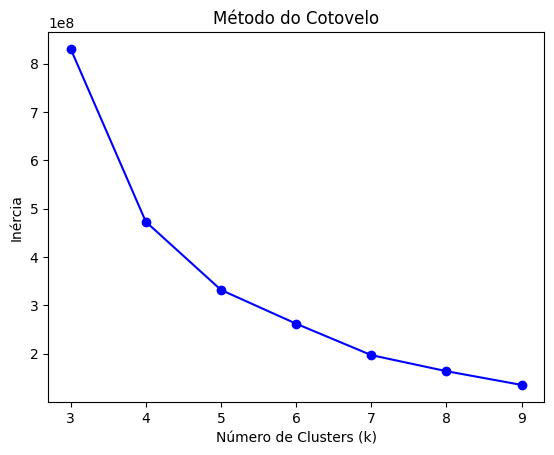

In [ ]:
plt.plot(k_values, inercias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

Observamos que a inércia diminui à medida que aumentamos o número de clusters. No entanto, a taxa de redução da inércia começa a diminuir significativamente, indicando que esse valor pode ser escolhido como o número ideal de clusters para o conjunto de dados GeoLife GPS Trajectories.

In [ ]:
# Analisando o gráfico, o número de cluster que defini foi 5
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(dados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Obtendo os rótulos dos clusters e os centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
print(labels)

[2 2 2 ... 2 2 2]


In [ ]:
print(centroids)

[[  26.59719776  115.16615002]
 [  42.80468482 -117.33383642]
 [  39.89690532  116.45993002]
 [  44.77501584    6.83037758]
 [  34.83162622   96.72133026]]


## Por fim, podemos observar no gráfico abaixo os clusters separados a partir das latitude e longitudes.

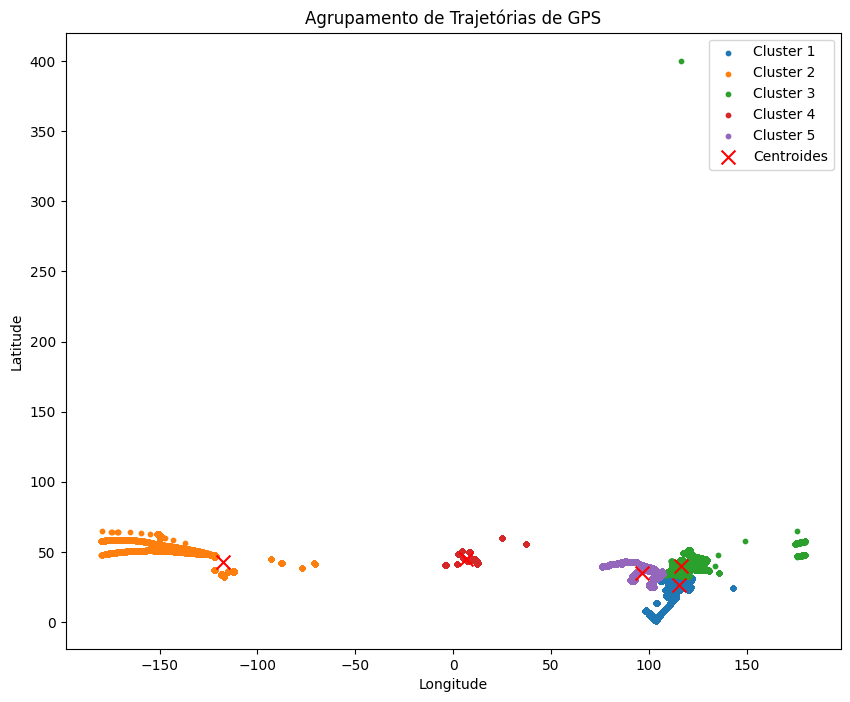

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(dados[labels == i, 1], dados[labels == i, 0], s=10, label=f"Cluster {i+1}")
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=100, label='Centroides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Agrupamento de Trajetórias de GPS')
plt.legend()
plt.show()

### Agrupamento das Trajetórias
Com base no valor de k determinado pelo método do cotovelo, aplicamos o algoritmo K-means para agrupar as trajetórias de GPS. As trajetórias foram divididas em k clusters distintos.

Podemos observar que os clusters formados pelo K-means destacam áreas de atividade e movimento semelhantes. Essa informação pode ser útil para análises de mobilidade urbana, planejamento urbano e detecção de padrões de movimento.

### Lugares relacionados
Podemos destacar que o agrupamento dos lugares pode condizer com a locaização dos locais frequentados pelas pessoas que são próximas. A descrição de cada cluster é uma suposição, haja vista que o dataset não possui mais informações referentes a característica de cada pessoa com suas localizações geográficas para definir de fato. Algumas suposições são:

- Nos clusters 1, 3 e 5, nota-se que há um grande fluxo de pessoas a um mesmo lugar, ou que moram em lugar e se deslocam a outro. Nesse caso há duas possibilidades:
  - Os grupos saem de seus lugares e vão ao centro urbano da cidade, seja pessoas mais novas, velhas, mas que necessitam frequentar o centro urbano, como escolas, médicos, turismo
  - Os grupos estão se hospedando, ou moram em um lugar central e se deslocam, para turismo ou para trabalho em um lugar mais longe de onde se hospedam, como nos centros urbanos.

- Cluster 2 representa um grupo mais afastado dos demais, mas com grande movimentação de pessoas. Pode-se inferir possibilidade de pessoas turísticas em um lugar mais afastado dos centros urbanos da China. Mas que pesquisando no Google Maps, observa-se um lugar de turismo que não há moradias por perto e é longe dos lugares mais conhecidos e visitados da China.

- No cluster 4, pode representar um pequeno fluxo de pessoas, como também de quantidade em relação a outros grupos. Pode-se inferir que é um turismo de lugares mais afastados e pouco conhecido, como de pessoas que moram em áreas rurais.

### Outras possibilidades de pessoas em cada clusters:

- No cluster 1, observa-se uma grande quantidade de pessoas concentradas em um hotel que se deslocam para passeio.
- No cluster 2, observa-se um grande fluxo de pessoas que se deslocam diariamente, possívelmente pela localização do trabalho e de suas moradias.
- No cluster 3, observa-se um uma grande concentração ao lugar semelhante ao cluster 1. Entretanto, pode destacar que o fluxo de pessoas está direcionado mais a latitude 0.
- No cluster 4, observa-se um grupo de pessoas mais distanciadas de todos os clusters. Como não apresenta um grande número de pessoas, pode-se haver uma equivalência as pessoas que moram áreas rurais, ou outra característica diferente dos demais clusters.
- No cluster 5, observa-se um uma grande concentração ao lugar semelhante ao cluster 1 e ao cluster 3. Entretanto, pode destacar que são áreas semelhantes, mas direcionado a outro público alvo do que ao cluster 1 e 3, mas em lugar próximo ou até mesmo uma pequena divisão. Esse cluster destaca que as pessoas possuem outro tipo de rotina e deslocamento que se deslocam em direção a longitude de maior valor.

## Conclusão
Neste estudo, aplicamos o algoritmo K-means no conjunto de dados GeoLife GPS Trajectories e obtivemos resultados interessantes. A análise do método do cotovelo nos ajudou a determinar o número ideal de clusters, e os clusters formados pelo K-means destacaram áreas com padrões de movimento semelhantes.

Esses resultados podem ser utilizados para diversas aplicações, como análise de mobilidade urbana, detecção de congestionamentos, identificação de locais populares e análise do comportamento dos usuários de aplicativos de navegação.

Entretanto, como não há mais dados diponíveis como idade, gênero, ocupação, renda, entre outras características demográficas, não tem como definir de fato quais as características de cada cluster e realizar recomendações.